In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [20]:
Jcrit = np.log(1+np.sqrt(2))/2 

Lx, Ly = 100, 100
J = 1*jcrit
H = 0

s = np.ones((Lx+2, Ly+2),dtype = 'i4')
# i4 = int 4 bite

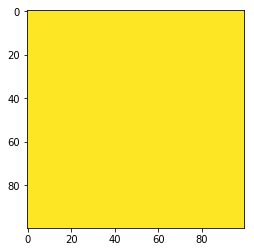

In [4]:
plt.figure()
im = plt.imshow(sigma, vmin = -1 , vmax =1)

In [24]:
def energy(s ,J):
    return (-J * np.sum(s[:-1,:] * s[1:,:]) 
         + -J * np.sum(s[:,:-1] * s[:,1:]) 
         + -H * np.sum(s))


In [5]:
def setBoundary(sigma, val):# val = [above,down,left,right] periodic condition

    sigma[0,:]  = val[0]
    sigma[-1,:] = val[1]
    sigma[:,0]  = val[2]
    sigma[:,-1] = val[3]
    return


In [ ]:
#mohasebat zir baraye mcflip dar zaman tolani tari run mishavand.

In [120]:
# def mcflip2(s, J):
#     Lx ,Ly =s.shape
#     for i in range(0,Lx,2):
#         for j in range(0,Ly,2): 
#             deltaE = -2*(J*(s[i%Lx][j%Ly]*(s[i%Lx][(j+1)%Ly]+ s[i%Lx][(j-1)%Ly]+s[(i+1)%Lx][j%Ly]+s[(i-1)%Lx][j%Ly]))+H)
#             p = np.exp( -deltaE)
#             if p > np.random.rand():
#                 s[i][j] = -s [i][j]
#     setBoundary(s,[s[-2,:],s[1,:],s[:,-2],s[:,1]])
#     for i in range(1,Lx,2):
#         for j in range(0,Ly,2): 
        
#             deltaE = -2*(J*(s[i%Lx][j%Ly]*(s[i%Lx][(j+1)%Ly]+ s[i%Lx][(j-1)%Ly]+s[(i+1)%Lx][j%Ly]+s[(i-1)%Lx][j%Ly]))+H)
#             p = np.exp( -deltaE)
#             if p > np.random.rand():
#                 s[i][j] = -s [i][j]
#     setBoundary(s,[s[-2,:],s[1,:],s[:,-2],s[:,1]])
#     for i in range(0,Lx,2):
#         for j in range(1,Ly,2): 
        
#             deltaE = -2*(J*(s[i%Lx][j%Ly]*(s[i%Lx][(j+1)%Ly]+ s[i%Lx][(j-1)%Ly]+s[(i+1)%Lx][j%Ly]+s[(i-1)%Lx][j%Ly]))+H)
#             p = np.exp( -deltaE)
#             if p > np.random.rand():
#                 s[i][j] = -s [i][j]
#     setBoundary(s,[s[-2,:],s[1,:],s[:,-2],s[:,1]])
#     for i in range(1,Lx,2):
#         for j in range(1,Ly,2): 
        
#             deltaE = -2*(J*(s[i%Lx][j%Ly]*(s[i%Lx][(j+1)%Ly]+ s[i%Lx][(j-1)%Ly]+s[(i+1)%Lx][j%Ly]+s[(i-1)%Lx][j%Ly]))+H)
#             p = np.exp( -deltaE)
#             if p > np.random.rand():
#                 s[i][j] = -s [i][j]
#     setBoundary(s,[s[-2,:],s[1,:],s[:,-2],s[:,1]])
#     return


In [127]:
def mcflip_sublat(sigma,a,b, J):

    
    Lx, Ly = sigma.shape
    
    localH = H * sigma[1+a:-1:2, 1+b:-1:2] + J * sigma[1+a:-1:2, 1+b:-1:2] *(
            sigma[2+a:   :2, 1+b: -1:2] + # to the right
            sigma[  a: -2:2, 1+b: -1:2] + # to the left
            sigma[1+a: -1:2, 2+b:   :2] + # up
            sigma[1+a: -1:2,   b: -2:2]   # down 
            )
    
    #m = np.tanh(localH)
    #p = (m+1)/2
    
    p = np.exp(-2 * localH)
    
    sigma[1+a:-1:2, 1+b:-1:2] *= -1 * (2*(np.random.rand(Lx//2-1,Ly//2-1) < p) - 1)
                
    return


In [128]:
def mcflip0(sigma, J):

    mcflip_sublat(sigma,0,0, J)
    setBoundary(sigma,[sigma[-2,:],sigma[1,:],sigma[:,-2],sigma[:,1]])## upgrade boundary after each sublattice_flip
    
    mcflip_sublat(sigma,1,0, J)
    setBoundary(sigma,[sigma[-2,:],sigma[1,:],sigma[:,-2],sigma[:,1]])## upgrade boundary after each sublattice_flip
    
    mcflip_sublat(sigma,0,1, J)
    setBoundary(sigma,[sigma[-2,:],sigma[1,:],sigma[:,-2],sigma[:,1]])## upgrade boundary after each sublattice_flip
    
    mcflip_sublat(sigma,1,1, J)
    setBoundary(sigma,[sigma[-2,:],sigma[1,:],sigma[:,-2],sigma[:,1]])## upgrade boundary after each sublattice_flip
    
    return


In [129]:
def magnetization(s):

    M = 0
    M = np.mean(s)
    
    return M

In [130]:
def move(N = 10000, t =20):
    # save magnetizatiation and energy
    e= []
    m = []   
    for i in range(N):
        mcflip0(s, J)
        if i % t == 0:
            m.append(magnetization(s))
            e.append(energy(s, J))
    E = np.array(e)
    M = np.array (m)
    
   # return as arrays
    return (M,E)

In [131]:
def acf(x, l):

    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]          for i in range(1, l)])

In [132]:
def corr_len(auto_corr):

#     import pdb;pdb.set_trace()
    for ksi, ac in enumerate(auto_corr):
        if (np.abs(ac - (1/np.e)) <= 0.05) and (np.abs(ac - (1/np.e)) < np.abs(auto_corr[ksi+1] - (1/np.e))):
            print(ksi)
            return ksi


In [133]:
#mohasebeye E , M bad az tol hambastegi zamani
def Generate(s,J):

    M0, E0 = [0], [0]
    step = 0
    
    M0, E0 = move(3000,1) ##  magnetizations and energy first sampel 
    ac = acf(M0[2000:],800)
    #     plt.plot (range(2000,3000),ac)
#     plt.title('auto-correlation vs step for L =100 and j = jcrit')
#     plt.legend(['auto-correlation'])
#     plt.xlabel(" step ")
#     plt.ylabel(" auto-correlation ")
#     plt.show()
    step = corr_len(ac) ## find correlation-lenth of magnetizations in time
    if step == None:
        step = 1
    M, E = M0[2000::step], E0[2000::step]
    
    if int(1000//step) < 800: ## generate more data
        M0, E0 = move((800*step-1000),step)
        M = np.append(M,M0)
        E = np.append(E,E0)
   
    return(M, E, step)

In [ ]:
#khod hambastegi makani
def cl (s ,J,L):
    c =[]
    for j in range (20):
        for i in range (5):

            x = np.randon.randint (0,L)
            y = np.randon.randint (0,L)
            s_i.append (s[x][y])
            s_j.append(s[x][(y+j)%L])
        si = np.array(s_i)
        sj = np.arrayy (sj)
        c . append((np.mean(si*sj)-np.mean(si)*np.mean(sj))/np.var(si))
    return sum (c)

In [212]:
from tqdm import tqdm

J = 1*jcrit
H = 0
for L in [50,100,150,200]:
    s = np.ones((L+2, L+2),dtype = 'i4')

    Js = [0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.34,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.425,0.43,0.435,0.436,0.437,0.438,0.439,0.44,0.441,0.442,0.443,0.444,0.445,0.45,0.446,0.447,0.448,0.449,0.45,0.451,0.452,0.453,0.454,0.455,0.456,0.457,0.46,0.48,0.49,0.5,0.54,0.58,0.6,0.64,0.7]
    #Js = [Jcrit]


    M_mean = np.zeros_like(Js)
    E_mean  = np.zeros_like(Js)
    M_var = np.zeros_like(Js)
    E_var = np.zeros_like(Js)

    steps = np.zeros_like(Js)

    for i,J in tqdm(enumerate(Js)):
        print("J: ", J)
        M, E, Step = Generate(s,J)

        M_mean[i] = np.mean(M)
        E_mean[i] = np.mean(E)
        M_var[i] = np.var(M)
        E_var[i] = np.var(E)

        steps[i] = Step

    np.savetxt('m-mean2'+str(L)+'.txt',M_mean)
    np.savetxt('e-mean2'+str(L)+'.txt',E_mean)
    np.savetxt('evar2'+str(L)+'.txt',M_var)
    np.savetxt('mvar2'+str(L)+'.txt',E_var)








0it [00:00, ?it/s]

J:  0.22








1it [00:04,  4.37s/it]

J:  0.24








2it [00:09,  4.58s/it]

J:  0.26








3it [00:13,  4.40s/it]

J:  0.28








4it [00:17,  4.35s/it]

J:  0.3








5it [00:21,  4.34s/it]

2
J:  0.32








6it [00:25,  4.16s/it]

J:  0.34








7it [00:29,  3.98s/it]

J:  0.36
7








8it [00:35,  4.66s/it]

J:  0.34
4








9it [00:40,  4.71s/it]

J:  0.36
6








10it [00:46,  4.99s/it]

J:  0.37
6








11it [00:52,  5.42s/it]

J:  0.38
13








12it [01:01,  6.59s/it]

J:  0.39
21








13it [01:15,  8.64s/it]

J:  0.4
23








14it [01:28, 10.02s/it]

J:  0.41
24








15it [01:42, 11.13s/it]

J:  0.42
119








16it [02:38, 24.79s/it]

J:  0.425
130








17it [03:43, 36.66s/it]

J:  0.43
116








18it [04:41, 43.20s/it]

J:  0.435
107








19it [05:34, 46.17s/it]

J:  0.436
372








20it [08:32, 85.69s/it]

J:  0.437
26








21it [08:48, 64.79s/it]

J:  0.438
40








22it [09:10, 51.92s/it]

J:  0.439
32








23it [09:29, 41.96s/it]

J:  0.44
19








24it [09:40, 32.80s/it]

J:  0.441
23








25it [09:53, 26.93s/it]

J:  0.442
23








26it [10:07, 22.82s/it]

J:  0.443
14








27it [10:16, 18.73s/it]

J:  0.444
68








28it [10:50, 23.24s/it]

J:  0.445
167








29it [12:10, 40.36s/it]

J:  0.45
36








30it [12:29, 34.03s/it]

J:  0.446
17








31it [12:40, 26.96s/it]

J:  0.447
49








32it [13:05, 26.57s/it]

J:  0.448
43








33it [13:28, 25.39s/it]

J:  0.449
37








34it [13:48, 23.69s/it]

J:  0.45
13








35it [13:56, 19.19s/it]

J:  0.451
7








36it [14:03, 15.34s/it]

J:  0.452
8








37it [14:09, 12.70s/it]

J:  0.453
25








38it [14:24, 13.37s/it]

J:  0.454
7








39it [14:31, 11.26s/it]

J:  0.455
17








40it [14:41, 11.14s/it]

J:  0.456
8








41it [14:48,  9.89s/it]

J:  0.457
7








42it [14:55,  8.84s/it]

J:  0.46
13








43it [15:04,  8.92s/it]

J:  0.48
5








44it [15:09,  7.81s/it]

J:  0.49








45it [15:13,  6.62s/it]

J:  0.5








46it [15:17,  5.75s/it]

2
J:  0.54








47it [15:20,  5.11s/it]

J:  0.58








48it [15:24,  4.70s/it]

1
J:  0.6








49it [15:28,  4.44s/it]

J:  0.64








50it [15:32,  4.25s/it]

J:  0.7








51it [15:36,  4.15s/it]





0it [00:00, ?it/s]

J:  0.22








1it [00:06,  6.34s/it]

J:  0.24








2it [00:12,  6.30s/it]

1
J:  0.26








3it [00:18,  6.27s/it]

J:  0.28








4it [00:24,  6.21s/it]

J:  0.3








5it [00:31,  6.41s/it]

J:  0.32








6it [00:38,  6.38s/it]

J:  0.34
4








7it [00:45,  6.79s/it]

J:  0.36
7








8it [00:55,  7.79s/it]

J:  0.34








9it [01:01,  7.24s/it]

J:  0.36
5








10it [01:10,  7.73s/it]

J:  0.37
8








11it [01:21,  8.70s/it]

J:  0.38
9








12it [01:33,  9.64s/it]

J:  0.39
15








13it [01:50, 11.86s/it]

J:  0.4
23








14it [02:15, 15.69s/it]

J:  0.41
27








15it [02:41, 18.93s/it]

J:  0.42
115








16it [04:27, 44.94s/it]

J:  0.425
133








17it [06:16, 64.31s/it]

J:  0.43
175








18it [08:41, 88.57s/it]

J:  0.435
215








19it [11:41, 115.77s/it]

J:  0.436
95








20it [13:03, 105.85s/it]

J:  0.437
182








21it [15:32, 118.73s/it]

J:  0.438
375








22it [21:07, 183.51s/it]

J:  0.439
45








23it [21:52, 142.10s/it]

J:  0.44
113








24it [23:41, 132.13s/it]

J:  0.441
29








25it [24:11, 101.43s/it]

J:  0.442
33








26it [24:43, 80.67s/it] 

J:  0.443
44








27it [25:25, 69.04s/it]

J:  0.444
48








28it [26:11, 62.21s/it]

J:  0.445
22








29it [26:34, 50.45s/it]

J:  0.45
62








30it [27:30, 52.07s/it]

J:  0.446
24








31it [27:55, 43.95s/it]

J:  0.447
25








32it [28:25, 39.56s/it]

J:  0.448
68








33it [29:26, 45.99s/it]

J:  0.449
21








34it [29:47, 38.73s/it]

J:  0.45
30








35it [30:16, 35.76s/it]

J:  0.451
13








36it [30:32, 29.73s/it]

J:  0.452
21








37it [30:53, 27.22s/it]

J:  0.453
31








38it [31:23, 27.89s/it]

J:  0.454
30








39it [31:52, 28.18s/it]

J:  0.455
21








40it [32:15, 26.74s/it]

J:  0.456
13








41it [32:34, 24.51s/it]

J:  0.457
21








42it [32:59, 24.64s/it]

J:  0.46
9








43it [33:14, 21.66s/it]

J:  0.48
3








44it [33:23, 17.76s/it]

J:  0.49
4








45it [33:30, 14.73s/it]

J:  0.5








46it [33:37, 12.26s/it]

2
J:  0.54








47it [33:43, 10.41s/it]

J:  0.58








48it [33:49,  9.22s/it]

1
J:  0.6








49it [33:55,  8.27s/it]

1
J:  0.64








50it [34:02,  7.69s/it]

J:  0.7








51it [34:08,  7.21s/it]





0it [00:00, ?it/s]

J:  0.22








1it [00:10, 10.21s/it]

J:  0.24








2it [00:21, 10.56s/it]

J:  0.26








3it [00:32, 10.81s/it]

J:  0.28








4it [00:42, 10.53s/it]

J:  0.3








5it [00:52, 10.33s/it]

2
J:  0.32








6it [01:03, 10.46s/it]

J:  0.34
3








7it [01:15, 10.84s/it]

J:  0.36
5








8it [01:29, 11.90s/it]

J:  0.34
4








9it [01:42, 12.19s/it]

J:  0.36
4








10it [01:55, 12.44s/it]

J:  0.37
12








11it [02:19, 15.98s/it]

J:  0.38
10








12it [02:41, 17.60s/it]

J:  0.39
16








13it [03:15, 22.51s/it]

J:  0.4
22








14it [03:58, 28.78s/it]

J:  0.41
52








15it [05:24, 45.99s/it]

J:  0.42
108








16it [08:23, 85.96s/it]

J:  0.425
282








17it [15:57, 196.31s/it]

J:  0.43
94








18it [18:34, 184.35s/it]

J:  0.435
156








19it [22:38, 202.39s/it]

J:  0.436
103








20it [25:14, 188.38s/it]

J:  0.437
55








21it [26:40, 157.88s/it]

J:  0.438
456








22it [37:34, 306.63s/it]

J:  0.439
44








23it [38:43, 235.30s/it]

J:  0.44
31








24it [39:39, 181.41s/it]

J:  0.441
74








25it [41:39, 163.13s/it]

J:  0.442
105








26it [44:31, 165.68s/it]

J:  0.443
234








27it [50:31, 223.90s/it]

J:  0.444
101








28it [53:11, 204.99s/it]

J:  0.445
72








29it [55:18, 181.39s/it]

J:  0.45
28








30it [56:13, 143.45s/it]

J:  0.446
54








31it [57:55, 131.16s/it]

J:  0.447
65








32it [59:46, 125.06s/it]

J:  0.448
24








33it [1:00:26, 99.47s/it]

J:  0.449
96








34it [1:02:45, 111.45s/it]

J:  0.45
49








35it [1:04:05, 101.92s/it]

J:  0.451
20








36it [1:04:44, 83.13s/it] 

J:  0.452
24








37it [1:05:34, 73.10s/it]

J:  0.453
15








38it [1:06:02, 59.55s/it]

J:  0.454
10








39it [1:06:23, 47.98s/it]

J:  0.455
20








40it [1:06:57, 43.97s/it]

J:  0.456
12








41it [1:07:21, 37.95s/it]

J:  0.457
8








42it [1:07:40, 32.05s/it]

J:  0.46
8








43it [1:07:58, 28.00s/it]

J:  0.48
4








44it [1:08:11, 23.51s/it]

J:  0.49
3








45it [1:08:26, 20.89s/it]

J:  0.5








46it [1:08:37, 17.85s/it]

J:  0.54








47it [1:08:47, 15.68s/it]

J:  0.58








48it [1:08:58, 14.32s/it]

1
J:  0.6








49it [1:09:09, 13.33s/it]

J:  0.64








50it [1:09:19, 12.29s/it]

J:  0.7








51it [1:09:29, 11.54s/it]





0it [00:00, ?it/s]

J:  0.22








1it [00:15, 15.76s/it]

J:  0.24








2it [00:32, 15.92s/it]

1
J:  0.26








3it [00:49, 16.45s/it]

J:  0.28








4it [01:05, 16.19s/it]

J:  0.3








5it [01:20, 16.02s/it]

2
J:  0.32








6it [01:36, 15.99s/it]

J:  0.34
3








7it [01:54, 16.50s/it]

J:  0.36
6








8it [02:19, 19.00s/it]

J:  0.34
3








9it [02:37, 18.71s/it]

J:  0.36
5








10it [02:59, 19.86s/it]

J:  0.37
6








11it [03:24, 21.35s/it]

J:  0.38
11








12it [04:00, 25.78s/it]

J:  0.39
13








13it [04:41, 30.23s/it]

J:  0.4
19








14it [05:35, 37.38s/it]

J:  0.41
41








15it [07:20, 57.63s/it]

J:  0.42
42








16it [09:07, 72.45s/it]

J:  0.425
105








17it [13:16, 125.31s/it]

J:  0.43
147








18it [19:17, 196.08s/it]

J:  0.435








19it [19:33, 142.01s/it]

J:  0.436
71








20it [22:26, 151.39s/it]

J:  0.437
170








21it [28:58, 223.47s/it]

J:  0.438
135








22it [34:33, 256.95s/it]

J:  0.439








23it [34:51, 185.41s/it]

J:  0.44
181








24it [42:53, 274.36s/it]

J:  0.441
136








25it [48:52, 299.82s/it]

J:  0.442
114








26it [54:04, 303.46s/it]

J:  0.443
297








27it [1:08:05, 464.55s/it]

J:  0.444
32








28it [1:09:42, 354.45s/it]

J:  0.445
110








29it [1:15:01, 343.61s/it]

J:  0.45
19








30it [1:16:02, 259.03s/it]

J:  0.446
20








31it [1:17:09, 201.23s/it]

J:  0.447
35








32it [1:19:03, 175.33s/it]

J:  0.448
29








33it [1:20:50, 154.75s/it]

J:  0.449
29








34it [1:22:41, 141.62s/it]

J:  0.45
20








35it [1:24:08, 125.13s/it]

J:  0.451
28








36it [1:25:57, 120.39s/it]

J:  0.452
66








37it [1:29:36, 149.89s/it]

J:  0.453
45








38it [1:32:34, 158.40s/it]

J:  0.454
14








39it [1:33:47, 132.74s/it]

J:  0.455
30








40it [1:35:36, 125.75s/it]

J:  0.456
11








41it [1:36:20, 101.17s/it]

J:  0.457
20








42it [1:37:29, 91.51s/it] 

J:  0.46
7








43it [1:38:06, 75.17s/it]

J:  0.48
4








44it [1:38:33, 60.48s/it]

J:  0.49
3








45it [1:38:54, 48.66s/it]

J:  0.5








46it [1:39:11, 39.23s/it]

J:  0.54








47it [1:39:34, 34.40s/it]

J:  0.58








48it [1:39:52, 29.62s/it]

J:  0.6








49it [1:40:13, 26.85s/it]

1
J:  0.64








50it [1:40:33, 24.73s/it]

J:  0.7








51it [1:40:51, 22.86s/it]

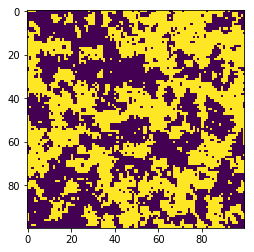

In [44]:
mcflip0 (sigma)
fig, ax = plt.subplots()
im = plt.imshow(sigma, vmin = -1, vmax = 1)

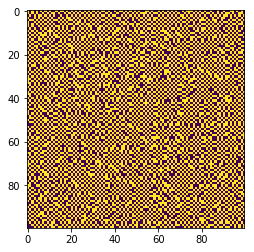

In [20]:
#animation
import matplotlib.animation as ani

fig, ax = plt.subplots()
im = plt.imshow(s, vmin = -1, vmax = 1)

def animate(i):
    """Take an mcstep and update image."""
    mcflip(s)
    im.set_data(s)
    return

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=1000)

ani.save('ising.gif',writer= 'pillow',fps=30)

In [218]:
J_m = []
J_E = []
J_c = []
J_x = []
M =[]
E=[]
M_var = []
E_var= []
i = 0
for L in [50,100,150,200]:
    M .append (np.loadtxt('m-mean2'+str(L)+'.txt'))
    J_m.append(np.log(abs( 1/Js[np.argmax(M[i])]-1/Jcrit)))
    
    E .append (np.loadtxt('e-mean2'+str(L)+'.txt'))
    J_E.append( np.log(abs(1/Js[np.argmax(E[i])]-1/Jcrit)))
    
    M_var.append( np.loadtxt('evar2'+str(L)+'.txt'))
    J_x.append( np.log(abs(1/Js[np.argmax(M_var[i])]-1/Jcrit)))
    
    E_var.append( np.loadtxt('mvar2'+str(L)+'.txt'))
    J_c.append(np.log( abs(1/Js[np.argmax(E_var[i])]-1/Jcrit)))
    i = i+1
    

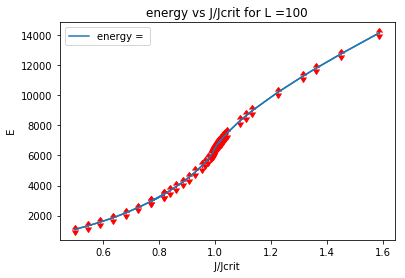

In [219]:
#plot 
import matplotlib.pyplot as plt
import numpy as np

#E
plt.plot (Js/Jcrit, abs(E[1]))
plt.errorbar(Js/Jcrit,abs(E[1]),yerr=(np.sqrt(E_var[1])),ecolor='red' ,elinewidth= 1,uplims=True,lolims=True)
plt.title('energy vs J/Jcrit for L =100')
plt.legend(['energy = '])
plt.xlabel(" J/Jcrit ")
plt.ylabel(" E ")
plt.show()

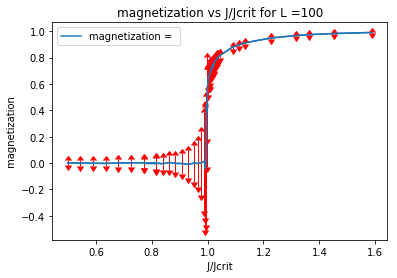

In [220]:

#M
plt.plot (Js/Jcrit, (M[1]))
plt.errorbar(Js/Jcrit,M[1],yerr=(np.sqrt(M_var[1])),ecolor='red' ,elinewidth= 1,uplims=True,lolims=True)
plt.title('magnetization vs J/Jcrit for L =100')
plt.legend(['magnetization = '])
plt.xlabel(" J/Jcrit ")
plt.ylabel(" magnetization ")
plt.show()

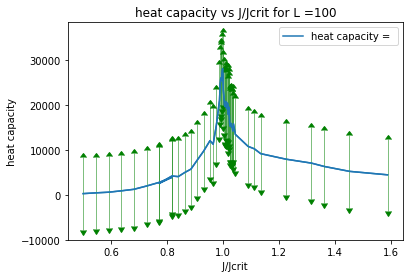

Text(0, 0.5, ' heat capacity ')

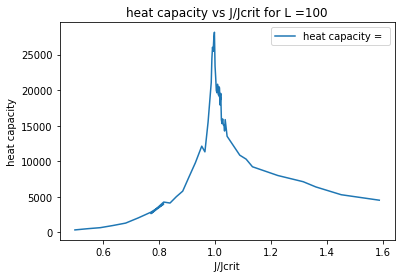

In [224]:
#C
Js = np.array(Js)
plt.plot (Js/Jcrit,(E_var[1]*Js/Jcrit)*(Js/Jcrit))
plt.errorbar(Js/Jcrit,(E_var[1]*Js/Jcrit)*(Js/Jcrit),yerr=(np.sqrt(np.var((E_var[1]*Js/Jcrit)*(Js/Jcrit)))),ecolor='green' ,elinewidth= 0.5,uplims=True,lolims=True)
plt.title('heat capacity vs J/Jcrit for L =100')
plt.legend(['heat capacity = '])
plt.xlabel(" J/Jcrit ")
plt.ylabel(" heat capacity ")
plt.show()
plt.plot (Js/Jcrit,(E_var[1]*Js/Jcrit)*(Js/Jcrit))
plt.title('heat capacity vs J/Jcrit for L =100')
plt.legend(['heat capacity = '])
plt.xlabel(" J/Jcrit ")
plt.ylabel(" heat capacity ")

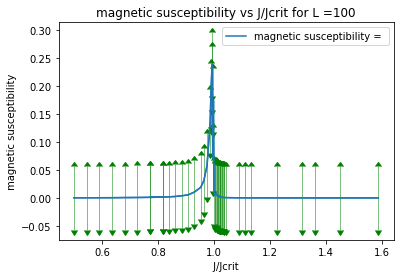

Text(0, 0.5, ' magnetic susceptibility ')

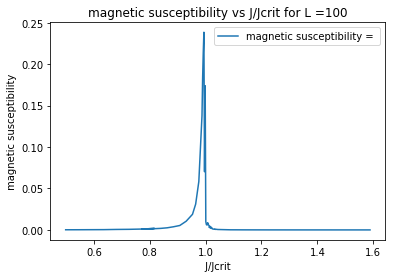

In [225]:
#X
plt.plot (Js/Jcrit,(M_var[1]*Js/Jcrit))
plt.errorbar(Js/Jcrit,(M_var[1]*Js/Jcrit),yerr=(np.sqrt(np.var((M_var[1]*Js/Jcrit)))),ecolor='green' ,elinewidth= 0.5,uplims=True,lolims=True)
plt.title('magnetic susceptibility vs J/Jcrit for L =100')
plt.legend(['magnetic susceptibility = '])
plt.xlabel(" J/Jcrit ")
plt.ylabel(" magnetic susceptibility ")
plt.show()
plt.plot (Js/Jcrit,(M_var[1]*Js/Jcrit))
plt.title('magnetic susceptibility vs J/Jcrit for L =100')
plt.legend(['magnetic susceptibility = '])
plt.xlabel(" J/Jcrit ")
plt.ylabel(" magnetic susceptibility ")

In [ ]:
#plot vs lattice size

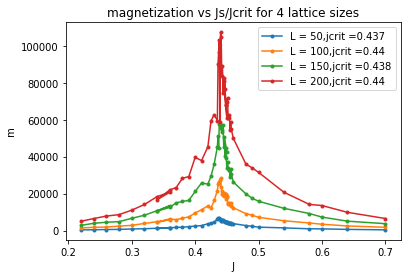

In [243]:
#M
L = (np.array([50,100,150,200]))
for i in range (len(L)):
    
    plt.plot( Js,E_var[i] ,'.-' )

plt.title('magnetization vs Js/Jcrit for 4 lattice sizes')
plt.legend(['L = '+str(L[0])+',jcrit ='+str(Js[np.argmax(E_var[0])]),'L = '+str(L[1])+',jcrit ='+str(Js[np.argmax(E_var[1])]),'L = '+str(L[2])+',jcrit ='+str(Js[np.argmax(E_var[2])]),'L = '+str(L[3])+',jcrit ='+str(Js[np.argmax(E_var[3])])])
plt.xlabel(" J ")
plt.ylabel(" m ")
plt.show()


m = -4.6891901863145786e-17


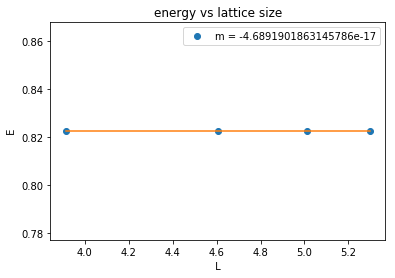

In [228]:
#E
L = np.log(np.array([50,100,150,200]))
m = np.polyfit(L , J_E ,1)
print ("m =",m[0])
plt.plot (L,J_E,'o' , L,L*m[0]+m[1])
plt.title('energy vs lattice size')
plt.legend(['m = '+str(m[0])])
plt.xlabel(" L ")
plt.ylabel(" E ")
plt.show()


m = 1.974923240092113


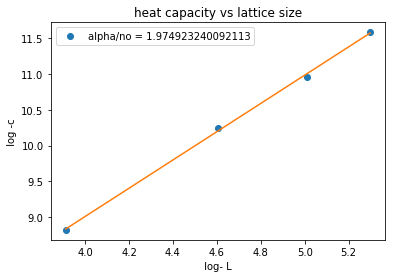

In [229]:
#c
L = np.log(np.array([50,100,150,200]))
Max =[]
for i in range (len(L)):
    Max. append( np.log(max (E_var[i])))
m = np.polyfit( L,Max ,1)
print ("m =",m[0])
plt.plot (L,Max,'o' , L,L*m[0]+m[1])
plt.title('heat capacity vs lattice size')
plt.legend(['alpha/no = '+str(m[0])])
plt.xlabel(" log- L ")
plt.ylabel(" log -c ")
plt.show()


m = -0.7989845552621473


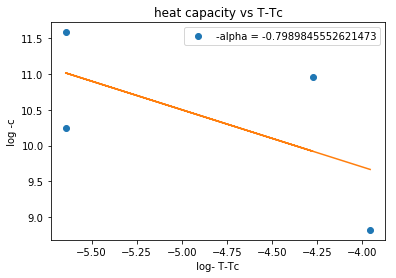

In [242]:
#c
L = np.log(np.array([50,100,150,200]))
Max =[]
Jc= np.array(J_c)
for i in range (len(L)):
    Max. append( np.log(max (E_var[i])))
m = np.polyfit( Jc,Max ,1)
print ("m =",m[0])
m= np.array(m)
plt.plot (Jc,Max,'o' , Jc,Jc*m[0]+m[1])
plt.title('heat capacity vs T-Tc')
plt.legend(['-alpha = '+str(m[0])])
plt.xlabel(" log- T-Tc ")
plt.ylabel(" log -c ")
plt.show()


m = 0.2469144175831583


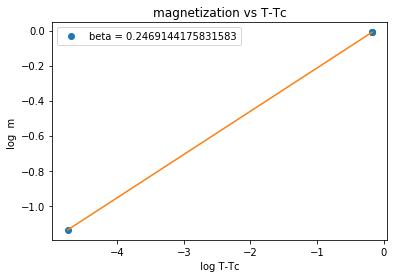

In [233]:
#M
L = np.log(np.array([50,100,150,200]))
Max =[]
Jm= np.array(J_m)
for i in range (len(L)):
    Max. append( np.log(max (M[i])))
m = np.polyfit(Jm , Max ,1)
print ("m =",m[0])
plt.plot (Jm,Max,'o' , Jm,Jm*m[0]+m[1])
plt.title('magnetization vs T-Tc')
plt.legend(['beta = '+str(m[0])])
plt.xlabel(" log T-Tc ")
plt.ylabel("log  m ")
plt.show()


m = -0.6156585701663305


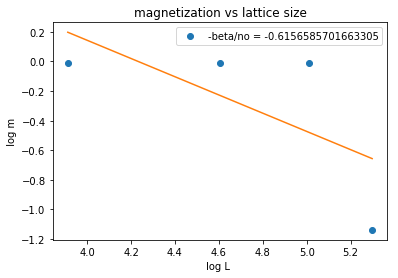

In [234]:
#M
L = np.log(np.array([50,100,150,200]))
Max =[]
Jm= np.array(J_m)
for i in range (len(L)):
    Max. append( np.log(max (M[i])))
m = np.polyfit(L , Max ,1)
print ("m =",m[0])
plt.plot (L,Max,'o' , L,L*m[0]+m[1])
plt.title('magnetization vs lattice size')
plt.legend(['-beta/no = '+str(m[0])])
plt.xlabel("log L ")
plt.ylabel(" log m ")
plt.show()


In [165]:
1.23/0.6

2.0500000000000003

m = 0.3911644615491712


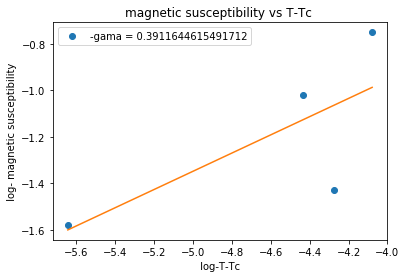

In [235]:
#X
L = np.log(np.array([50,100,150,200]))
Jx = np.array(J_x)
Max =[]
for i in range (len(L)):
    Max. append( np.log(max (M_var[i])))
m = np.polyfit(Jx , Max ,1)
print ("m =",m[0])
s= m[0]
plt.plot (Jx,Max,'o' , Jx, Jx*m[0]+m[1])
plt.title('magnetic susceptibility vs T-Tc ')
plt.legend(['-gama = '+str(m[0])])
plt.xlabel(" log-T-Tc ")
plt.ylabel(" log- magnetic susceptibility ")
plt.show()

m = -0.4642501082971527


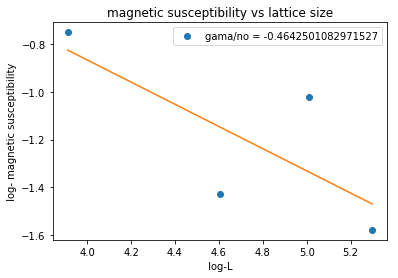

In [236]:
#X
L = np.log(np.array([50,100,150,200]))
Jx = np.array(J_x)
Max =[]
for i in range (len(L)):
    Max. append( np.log(max (M_var[i])))
m = np.polyfit(L , Max ,1)
print ("m =",m[0])
s= m[0]
plt.plot (L,Max,'o' , L, L*m[0]+m[1])
plt.title('magnetic susceptibility vs lattice size')
plt.legend(['gama/no = '+str(m[0])])
plt.xlabel(" log-L ")
plt.ylabel(" log- magnetic susceptibility ")
plt.show()

no = -0.17270863317997942


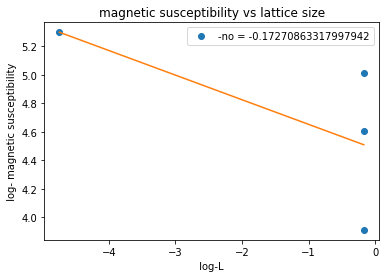

In [241]:
#ksi
L = np.log(np.array([50,100,150,200]))
Jm = np.array(J_m)
Max =[]
for i in range (len(L)):
    Max. append( np.log(max (M_var[i])))
m = np.polyfit(Jm , L ,1)
print ("no =",m[0])
s= m[0]
plt.plot (Jm , L,'o' , Jm, Jm*m[0]+m[1])
plt.title('magnetic susceptibility vs lattice size')
plt.legend(['-no = '+str(m[0])])
plt.xlabel(" log-L ")
plt.ylabel(" log- magnetic susceptibility ")
plt.show()

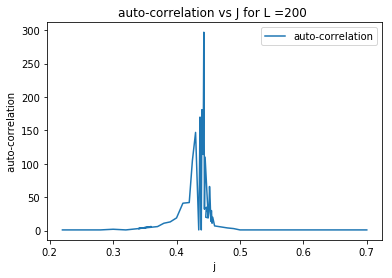

In [245]:
#correlation in time

plt.plot (Js,steps)
plt.title('auto-correlation vs J for L =200 ')
plt.legend(['auto-correlation'])
plt.xlabel(" j ")
plt.ylabel(" auto-correlation ")
plt.show()